## Machine Learning for Insurance Company

I work as the lead data scientist for an Insurance Company and my job is to create an automated system that  estimates the annual medical expenditure for new customers. This will help determine the annual insurance premium

First, I need to use pip to install all visualization libraries

In [20]:
!pip install plotly matplotlib seaborn --quiet

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv", "insurance.csv")

('insurance.csv', <http.client.HTTPMessage at 0x158365a10>)

In [21]:
df = pd.read_csv('insurance.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
#plotly historam with barchart on top
fig = px.histogram(df, x="age", marginal = 'box', nbins = 47, title = "Distribution of Age")


#gaps between the bars
fig.update_layout(bargap = 0.1)

#show the objects
fig.show()

In [25]:
fig = px.histogram(df, x = "bmi", marginal = 'box', nbins = 47, title = "Distribution of BMI")

#gaps between the bars
fig.update_layout(bargap = 0.1)

#show the objects
fig.show()

In [26]:
fig = px.histogram(df, x = "charges", marginal = 'box', color = 'smoker', title = "NonSmokers vs Smokers Charges Distribution")
#color in px is essentially like hue in seaborn, so we are coloring based on the smoker column

#gaps between the bars
fig.update_layout(bargap = 0.1)

#show the objects
fig.show()

There is a significant difference in the medical expenses between smokers and non smokers, as we can see that the median annual medical expenses for nonsmokers was around 7,300 dollars vs 34,500 dollars for smokers 

We should do this same comparison for sex and region

In [27]:
fig = px.histogram(df, x = "charges", marginal = 'box', color = 'sex', title = "Male vs Female Charges Distribution")
#color in px is essentially like hue in seaborn, so we are coloring based on the sex column

#gaps between the bars
fig.update_layout(bargap = 0.1)

#show the objects
fig.show()

In [28]:
fig = px.histogram(df, x = "charges", marginal = 'box', color = 'region', title = "Charges Distribution by Region")
#color in px is essentially like hue in seaborn, so we are coloring based on the region column

#gaps between the bars
fig.update_layout(bargap = 0.1)

#show the objects
fig.show()

In [29]:
fig = px.histogram(df, x = "charges", marginal = 'box', color = 'children', title = "Distribution of Charges based on Children")
fig.update_layout(bargap = 0.1)
fig.show()

In [30]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [31]:
fig = px.histogram(df, x = "smoker", color = 'sex', title = "Smoker")
fig.update_layout(bargap = 0.1)
fig.show()

### Key Takeaways

20% of customers in this dataset smoke and we can also observe that smoking is a more common habit among males. We can see that number of children, gender, and region were not that impactful on the medical expenses. 

We also need to confirm that the distribution of this dataset accurately represents the population

#### Now lets look into the relationship between age and charges through a scatterplot

In [32]:
fig = px.scatter(df, x = 'age', y = 'charges', color = 'smoker', opacity = 0.8, hover_data = ['sex'], title = 'Age vs. Charges')
fig.update_traces(marker_size = 7)
fig.show()

When we isolate the data by just looking at nonsmokers, we see a strong positive linear relationship between age and charges. We also see a bunch of randomly scattered points above this line, and perhaps these are people who don't smoke but have unique medical conditions which contributed to higher medical charges overall. 


If we look at smokers, we have two lines stacked on top of each other. This could be for smokers who have no other conditions and smokers who have additional health concerns. 

In [33]:
fig = px.scatter(df, x = 'bmi', y = 'charges', color = 'smoker', opacity = 0.8, hover_data = ['sex'], title = 'BMI vs. Charges')
fig.update_traces(marker_size = 7)
fig.show()

Not much of a correlation between bmi and charges

In [34]:
px.violin(df,  x = 'children', y = 'charges' )

In [35]:
# Lets look for the correlation coefficient between the different numerical columns
df.charges.corr(df.age)

0.2990081933306476

In [36]:
df.charges.corr(df.bmi)

0.19834096883362895

In [37]:
# We need to convert the categorical columns into numerical columns to find any sort of correlation 

#dictionary with smoker values
smoker_values = {'no': 0, 'yes': 1}

#we are creating a new column called smoker_numeric which is maping the smokers column to the smoker values
# x.map(dictionary) takes in a dictionary and applies it to all values in x. 
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

#now we are looking at the correlation between smoking and chargees
df.charges.corr(smoker_numeric)

0.787251430498478

In [38]:
#we can see that there is a strong positive correlation between smoking and charges

In [40]:
# to get correlation coefficients between all of the columns

df.corr()

/var/folders/yv/cmkwfb397q1ff8xyc_jl8dr80000gn/T/ipykernel_9750/1397168201.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


/var/folders/yv/cmkwfb397q1ff8xyc_jl8dr80000gn/T/ipykernel_9750/172312213.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



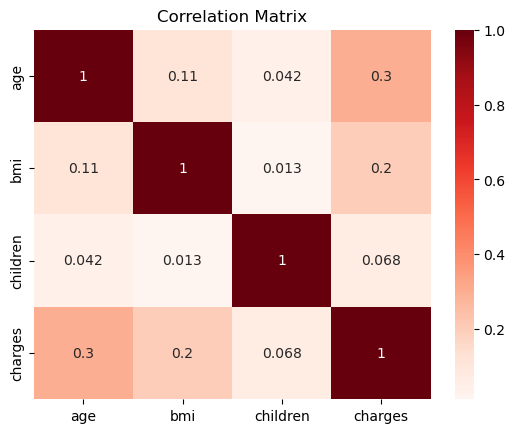

In [130]:
# we can also make this look pretty by passing the correlation matrix into a heat map

sns.heatmap(df.corr(), cmap = "Reds", annot = True);
plt.title('Correlation Matrix');

In [45]:
# We want to estimate value of "charges" using the value of "age" for nonsmokers

#first we create a datadrame that only contains the nonsmokers info

non_smoker_df = df[df.smoker == "no"]
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


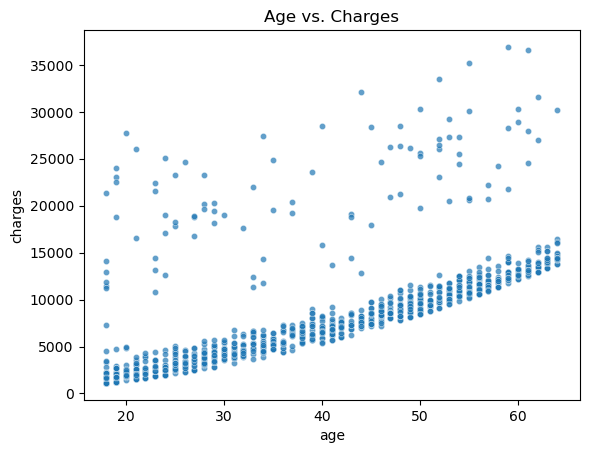

In [51]:
# then we look at the relationship between "age" and "charges" for nonsmokers 
plt.title("Age vs. Charges")
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 20);

We want to model a line in here somewhere

y = mx + b

charges = m(age) + b

given age, m, and b, we should be able to estimate charges, so we create a helper function for this

In [50]:
def estimate_charges(age,w,b):
    return w * age + b

Root Mean Squared Error 

RMSE = sqrt(sum of all (residuals)^2/n)

On average, each element in the prediction differes from the actual target by $RMSE

#### We want to modify the values of w and b to reduce the lost and improve the model

#### This can be done through 2 ways: 

- Ordinary Least Squares Regression: Smaller Datasets
- Stochastic gradient descent: Larger Datasets

In [123]:
!pip install scikit_learn --quiet
from sklearn.linear_model import LinearRegression

#READ EXPLANATION BELOW! samples == number of data points
#Remember that x needs to be a matrix, so 2 dimensions as shown in parameter breakdown 

help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



### Ordinary Least Squares Regression Model 

- Minimizing the sum of the resisuals squared to create a model

In [153]:
#creating a linear regression model 
model = LinearRegression()

#taking the age column for all nonsmokers as a 2D array, because the input is a 2D array
x = non_smoker_df[['age']]
y = non_smoker_df[['charges']]



#check to make sure both are 2D
print(x.shape, y.shape)

model.fit(x,y)

(1064, 1) (1064, 1)


LinearRegression()

In [154]:
#slope
model.coef_

array([[267.24891283]])

In [155]:
# y intercept
model.intercept_

array([-2091.42055657])

In [156]:
#lets predict the output (charges) for inputs (ages) 23, 27, and 61
model.predict([[23], [37], [61]])

/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[ 4055.30443855],
       [ 7796.78921819],
       [14210.76312614]])

In [157]:
# now lets make predictions for all the inputs

predictions = model.predict(x)
x

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [158]:
# here are the predicted outputs
predictions

array([[2719.0598744 ],
       [5391.54900271],
       [6727.79356686],
       ...,
       [2719.0598744 ],
       [2719.0598744 ],
       [3520.80661289]])

In [159]:
# here are the actual y values
y

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [160]:
# NOT BAD!!

# We can look at RMSE: Root Mean Square Error with 2 parameters, actual y values, and predictions

rmse(y, predictions)

/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



charges    4662.505767
dtype: float64

On average, we our predicted charges are off by $4662. 

In [161]:
#Lets visualize now

try_parameters(model.coef_,model.intercept_)

NameError: name 'try_parameters' is not defined

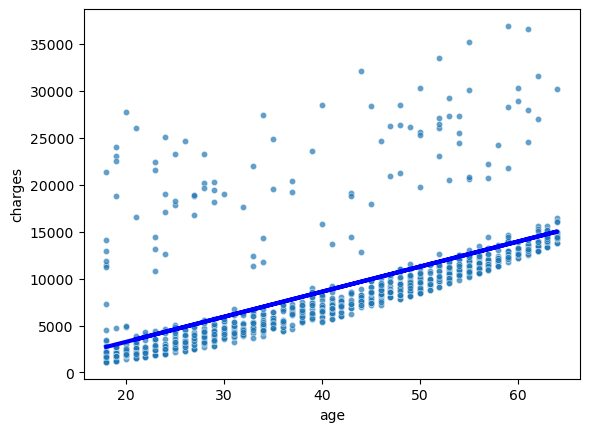

In [162]:
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 20);

plt.plot(x, predictions, color="blue", linewidth=3);

### Gradient Descent Technique

- Must use SGDRegressor class from scikit-learn to train a model.  
- Try this method later and see if we get a different answer

### 3 Components of this Machine Learning Model

- Model (How are we going to model it? Linear
- Error/Loss Function = RMSE
- Optimizer


### Linear Regression using Multiple Features

charges = w1 * age + w2 * bmi + b
- This is now a plane instead of a line, but we do the same steps with higher dimensions
- We have 2D input this time, so we pretty much have everything the same besides inputs

In [175]:
#Create inputs and targets
inputs = non_smoker_df[['age', 'bmi']]
targets = non_smoker_df[['charges']]

#confirm that inputs and targets are both 2D
print(inputs.shape, targets.shape)

#Create and train ML model
model = LinearRegression().fit(inputs, targets)

# Y values of predicitions
predictions = model.predict(inputs)

#Compute loss to evaluate effectiveness of model 
loss = rmse(targets, predictions)
print('Loss:', loss)

print("Coefficients: ",model.coef_, "Y-Int", model.intercept_)

(1064, 2) (1064, 1)
Loss: charges    4662.312835
dtype: float64
Coefficients:  [[266.87657817   7.07547666]] Y-Int [-2293.63209065]


/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



- We can see that by including BMI in the input, our loss didn't really change much. This means that the residuals (distance between actual and predicted points) didn't really change. We can conclude that BMI doesn't really impact the medical charges for patients.

In [178]:
# We need to train a linear regression model to estimate charges using BMI alone

inputs = non_smoker_df[['bmi']]
targets = non_smoker_df[['charges']]

#Create and train ML model

model = LinearRegression().fit(inputs, targets)

# Y values of predicitions
predictions = model.predict(inputs)

#Compute loss to evaluate effectiveness of model 
loss = rmse(targets, predictions)
print('Loss:', loss)

print("Coefficients: ",model.coef_, "Y-Int", model.intercept_)


Loss: charges    5969.772532
dtype: float64
Coefficients:  [[83.35055766]] Y-Int [5879.42408187]


/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



We can see that the loss is greater in the BMI to charges model 

#### Regression with 3 features

- charges = w1(age) + w2(bmi) + w3(children) + b

In [184]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

We can see that there isn't much of a relationship between children and charges but lets include it anyway to see how it impacts the loss of the regression model

In [189]:
total_inputs = non_smoker_df[['age', 'bmi', 'children']]
total_targets = non_smoker_df[['charges']]

print(total_inputs.shape, total_targets.shape)

model_3 = LinearRegression().fit(inputs, targets)

predictions = model_3.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

(1064, 3) (1064, 1)
Loss: charges    11355.317901
dtype: float64


/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



##### WE CAN SEE THAT INCLUDING ANOTHER VARIABLE DECREASED OUR LOSS! 

As we keep factoring in the variables our estimates will get closer to the true values


- We can see that adding children to the equation had a much greater impact on the loss than adding BMI. This means that number of children is more impactful 

### Lets not worry about smokers and use the original dataset

In [190]:
inputs = df[['age', 'bmi', 'children']]
targets = df[['charges']]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss4 = rmse(targets, predictions)

print('Loss:', loss)

Loss: charges    11355.317901
dtype: float64


/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



### Categorical Features for Machine Learning

- Remember that we didn't include smoker in the first place because it is categorical
- If we can somehow find a way to include this categorical data in the machine learning model, we can create one large model for the entire data set
     - If we have two categories (binary category) we just replace with 0 and 1
     - More than 2 categories, then we have to perform a one hot encoding 
     - if categories have a natural order (cold, neutral, warm, hot) we can do 1,2,3,4

In [193]:
smoker_codes = {
    'no': 0, 
    'yes': 1
}

df['smoker_code'] = df.smoker.map(smoker_codes)
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [200]:
final_inputs = df[['age', 'bmi', 'children', 'smoker_code']]
final_targets = df[['charges']]

print(final_inputs.shape, final_targets.shape)

final_model = LinearRegression().fit(final_inputs, final_targets)

final_predictions = final_model.predict(inputs)

loss = rmse(final_targets, final_predictions)
print('Loss:', loss)

# We went from a loss of 11k to around 6k by including the smoker code!. This is amazing!

(1338, 4) (1338, 1)
Loss: charges    6056.439217
dtype: float64


/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



If we want to convert Cat A, Cat B, and Cat C, into 100, 010, and 001, we have something in scikitlearn to help us do this. 

In our case we want to do this for the 4 different regions

- Remember this is called ONE HOT ENCODER

<Axes: xlabel='region', ylabel='charges'>

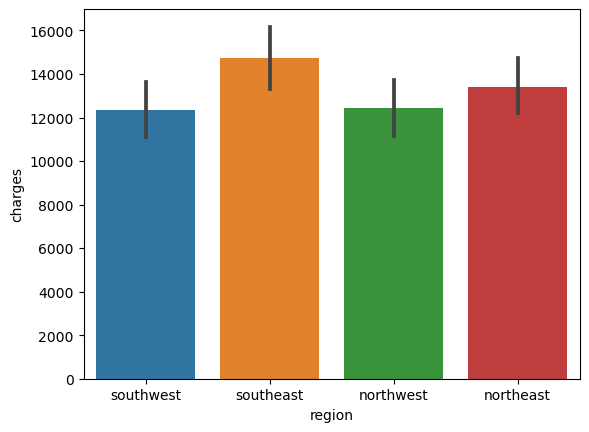

In [201]:
sns.barplot(data = df, x = "region", y = 'charges')

In [240]:
#use this library 
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()

# we pass in the region as a 2 dimensional array
enc.fit(df[['region']])

# identified the 4 values
enc.categories_


# We are transforming each of these 
enc.transform([['northeast'], ['northwest'], ['southeast'], ['southwest']]).toarray()

/Users/sujaysyal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [236]:
#We can create a column of 1000 0100 0010 0001 to represent the four regions
#We are transofrming the region column into matrix values

one_hot = enc.transform(df[['region']]).toarray()
one_hot


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [241]:
# insert back into the dataframe

df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


Essential question: Are two separate linear regression models, one for smokers and one for nonsmokers, better than a single regression model? Why or why not? Try it out and see if you can justify your answer with data.